In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
df=pd.merge(study_results,mouse_metadata,how="outer",on='Mouse ID')


# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
no_of_mice=df["Mouse ID"].count()
no_of_mice




1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateRowsDF =df[df.duplicated(['Mouse ID','Timepoint'])]
duplicateRowsDF


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.loc[df["Mouse ID"]== 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=df.drop(df.index[[861, 863, 865, 867, 869]])
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of unique mice per sex in the clean DataFrame.

no_of_mice=clean_df.groupby("Sex")["Mouse ID"].nunique()
no_of_mice

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor
#volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_obj=clean_df.groupby("Drug Regimen")

drug_mean= regimen_obj["Tumor Volume (mm3)"].mean()
drug_median= regimen_obj["Tumor Volume (mm3)"].median()

drug_var= regimen_obj["Tumor Volume (mm3)"].var()
drug_std= regimen_obj["Tumor Volume (mm3)"].std()
drug_sem= regimen_obj["Tumor Volume (mm3)"].sem()

tumor_regimen_df=pd.DataFrame({"Mean": drug_mean,
                              "Median": drug_median,
                               "Variamce": drug_var,
                              "Standard Dev":drug_std,
                              "SEM":drug_sem})
tumor_regimen_df





,Mean,Median,Variamce,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_obj1=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
#Summary statistics table
regimen_obj1

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

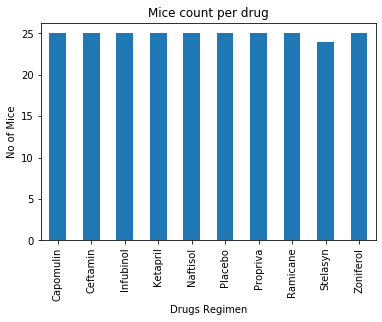

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice for each treatment throughout the course of the study using pandas.

#grouped by Drug Regimen and th count of unique mice per regimen is taken to be plotted.
mice_per_regimen=clean_df.groupby("Drug Regimen")["Mouse ID"].nunique()

mice_chart=mice_per_regimen.plot(kind ="bar")

mice_chart.set_title("Mice count per drug")


mice_chart.set_xlabel("Drugs Regimen")
mice_chart.set_ylabel("No of Mice")
plt.show()
plt.tight_layout()







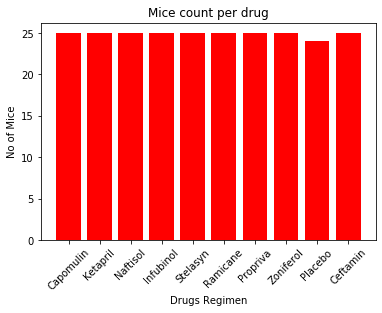

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#unique drug regimens list for plotting the x-axis of the bar plot
drugs=clean_df["Drug Regimen"].unique()
x_axis=np.arange(len(drugs))

#bar plot
plt.bar(x_axis,mice_per_regimen,color='red',align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,labels=drugs,rotation='45')
plt.title("Mice count per drug")

plt.xlabel("Drugs Regimen")
plt.ylabel("No of Mice")
plt.show()
plt.tight_layout()



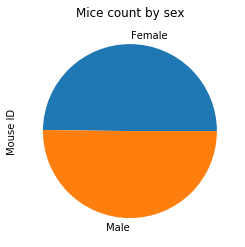

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


mice_by_gender=clean_df.groupby("Sex")["Mouse ID"].nunique()



mice_by_gender_plot=mice_by_gender.plot(kind='pie')
mice_by_gender_plot.set_title("Mice count by sex")
mice_by_gender_plot.set


plt.show()







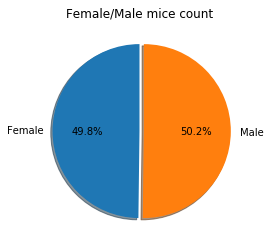

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender=clean_df["Sex"].unique()

plt.pie(mice_by_gender,labels=gender,explode=(0,0.05),
        autopct="%1.1f%%", shadow=True, startangle=90)


plt.title("Female/Male mice count")


plt.show()
plt.tight_layout()






## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#new_df=clean_df.loc[:,"Drug Regimen" == ["Capomulin","Ramicane","Infubinol","Ceftamin"]]


# Start by getting the last (greatest) timepoint for each mouse
mice=clean_df.groupby(["Mouse ID"])

max_timepoint=mice["Timepoint"].max() #max timepoint per mice
 #datframe with max timepoint per mice
max_timepoint.reset_index()


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [14]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df=pd.merge(clean_df,max_timepoint,how="inner",on=['Mouse ID','Timepoint'])
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17
245,i557,45,47.685963,1,Capomulin,Female,1,24
246,m957,45,33.329098,1,Capomulin,Female,3,19
247,f966,20,30.485985,0,Capomulin,Male,16,17


In [15]:

#Drop the row of Mice ID's for treatment other than 'Stelasyn'| 'Zoniferol'| 'Ketapril'| 'Propriva'| 'Naftisol' 
merged_df.drop(merged_df[merged_df['Drug Regimen']=='Placebo'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen']=='Stelasyn'].index,inplace=True) 
merged_df.drop(merged_df[merged_df['Drug Regimen']=='Zoniferol'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen']=='Ketapril'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen']=='Propriva'].index,inplace=True)
merged_df.drop(merged_df[merged_df['Drug Regimen']=='Naftisol'].index,inplace=True)
merged_df.reset_index()
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
29,c326,5,36.321346,0,Infubinol,Female,18,25
30,c139,45,72.226731,2,Infubinol,Male,11,28
31,v339,5,46.250112,0,Infubinol,Male,20,26
32,a577,30,57.031862,2,Infubinol,Female,6,25
...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17
245,i557,45,47.685963,1,Capomulin,Female,1,24
246,m957,45,33.329098,1,Capomulin,Female,3,19
247,f966,20,30.485985,0,Capomulin,Male,16,17


In [16]:

# Put treatments into a list for for loop (and later for plot labels)
treatments=merged_df["Drug Regimen"].unique()
treatments



array(['Capomulin', 'Infubinol', 'Ramicane', 'Ceftamin'], dtype=object)

In [17]:
# # Create empty list to fill with tumor vol data (for plotting)
vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for item in treatments:
    print(f"Drug Regimen: {item}")
    regimen_groups=merged_df.loc[merged_df["Drug Regimen"]==item]
# # Locate the rows which contain mice on each drug and get the tumor volumes and put it into a list named 'vol'
    vol.append(regimen_groups['Tumor Volume (mm3)'])
    quartiles =regimen_groups['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of final tumor volume is: {lowerq}")
    print(f"The upper quartile of final tumor volume is: {upperq}")
    print(f"The interquartile range of of final tumor volume is: {iqr}")
    print(f"The median of final tumor volume is: {quartiles[0.5]} ")
# Determine outliers using upper and lower bounds   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

# print if there are any outliers of Tumor volume per regimen group.
    Volume_outliers= regimen_groups.loc[(regimen_groups['Tumor Volume (mm3)'] < lower_bound) | (regimen_groups['Tumor Volume (mm3)'] > upper_bound)]
    x= Volume_outliers['Tumor Volume (mm3)']
    print(f" The outlier for Drug Regimen {item} : {x}\n\n")


Drug Regimen: Capomulin
The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of of final tumor volume is: 7.781863460000004
The median of final tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 The outlier for Drug Regimen Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)


Drug Regimen: Infubinol
The lower quartile of final tumor volume is: 54.04860769
The upper quartile of final tumor volume is: 65.52574285
The interquartile range of of final tumor volume is: 11.477135160000003
The median of final tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 The outlier for Drug Regimen Infubinol : 29    36.321346
Name: Tumor Volume (mm3), dtype: float64


Drug Regimen: Ramicane
The lower quartile of final tumor volume is: 31.56046955
The

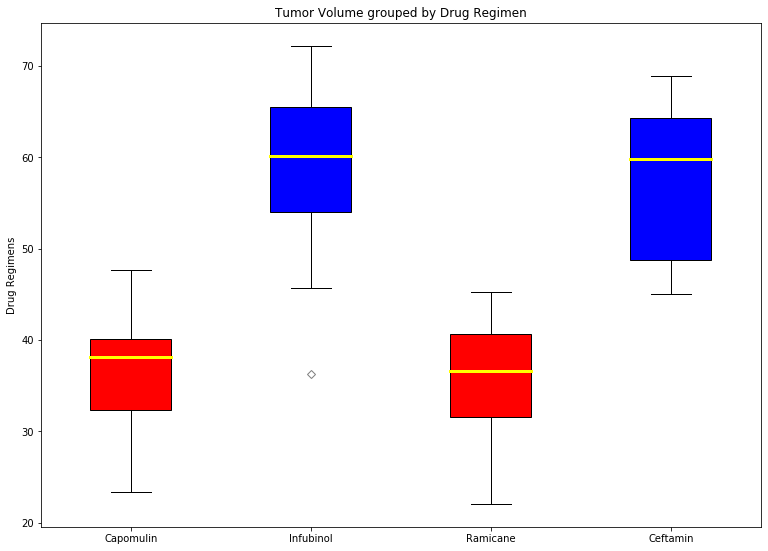

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 
# first way by using the 'vol' list

fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(vol,patch_artist=True) 
ax.set_xticklabels(treatments) 
colors=['r','b','r','b']
for patch, color in zip(bp['boxes'], colors): 
    patch.set_facecolor(color)
for median in bp['medians']: 
    median.set(color ='yellow', 
               linewidth = 3)
for flier in bp['fliers']: 
    flier.set(marker ='D', 
              color ='#e7298a', 
              alpha = 0.5) 
  
# show plot 

plt.title("Tumor Volume grouped by Drug Regimen") 
plt.ylabel("TumorVolume ")
plt.ylabel("Drug Regimens")
plt.show()
  


Text(0, 0.5, 'TumorVolume ')

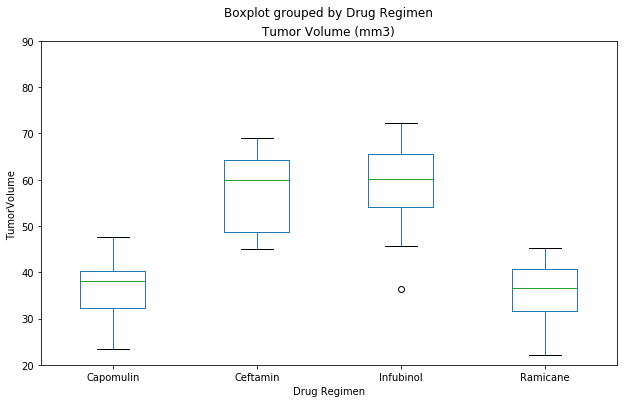

In [19]:
# 2nd way to create a box plot using the merged_df dataframe directly

merged_df.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False,figsize=(10,6))
plt.ylim(20,90)
plt.ylabel("TumorVolume ")


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

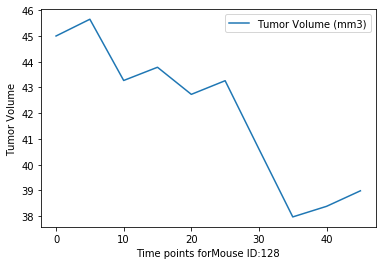

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mice1_obj=clean_df.loc[clean_df["Mouse ID"]=='b128']
capomulin_mice1_obj.plot(x='Timepoint',y='Tumor Volume (mm3)')
plt.xlabel('Time points forMouse ID:128')
plt.ylabel("Tumor Volume")
        



In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_obj=clean_df.loc[clean_df["Drug Regimen"]=='Capomulin']
capomulin_obj.reset_index(drop=True)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
225,m601,25,33.118756,1,Capomulin,Male,22,17
226,m601,30,31.758275,1,Capomulin,Male,22,17
227,m601,35,30.834357,1,Capomulin,Male,22,17
228,m601,40,31.378045,1,Capomulin,Male,22,17


In [22]:
avg_tumor_volume=capomulin_obj.groupby("Mouse ID").mean()
avg_tumor_volume.reset_index()
avg_tumor_volume.head()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


Text(0, 0.5, 'Tumor Volume(mm3)')

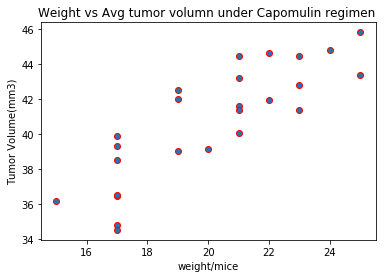

In [23]:
plt.scatter(avg_tumor_volume['Weight (g)'],avg_tumor_volume['Tumor Volume (mm3)'],edgecolors='r')
plt.title("Weight vs Avg tumor volumn under Capomulin regimen ")
plt.xlabel("weight/mice")
plt.ylabel("Tumor Volume(mm3)")

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient
weight = avg_tumor_volume.iloc[:,4]
tumor_volume = avg_tumor_volume.iloc[:,1]
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


In [25]:
#Regression
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(weight,tumor_volume)
line_eq= "y="+ str(round(slope,2)) + "x +"+str(round(intercept,2))
print(line_eq)

y=0.95x +21.55


Text(0, 0.5, 'Tumor Volume(mm3)')

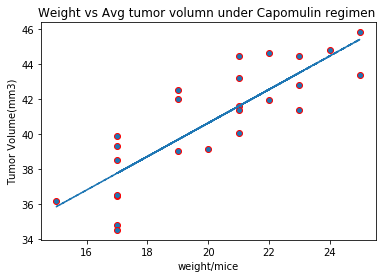

In [26]:
aa_fit = slope * weight + intercept
plt.scatter(avg_tumor_volume['Weight (g)'],avg_tumor_volume['Tumor Volume (mm3)'],edgecolors='r')
plt.title("Weight vs Avg tumor volumn under Capomulin regimen ")
plt.plot(weight,aa_fit,"--")
plt.xlabel("weight/mice")
plt.ylabel("Tumor Volume(mm3)")
